<a href="https://colab.research.google.com/github/AlexUrtubia/prediccion_ventas_comida/blob/main/Sales_Prediction_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Seguiremos trabajando en tu proyecto de predicción de ventas. El objetivo de esto es ayudar al minorista a comprender las propiedades de los productos y puntos de venta que juegan un papel crucial en el aumento de las ventas.

Para la Parte 5, tu tarea es usar Regresión lineal o KNN (¡o ambos!) Para crear un modelo para predecir las ventas.


In [2]:
# Se importan las librerías esenciales 
import pandas as pd
import numpy as np

In [3]:
# Se crea el df desde el directorio en Google Drive
df = pd.read_csv('/content/drive/MyDrive/Proyecto1/df_sin_v0.csv')
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDO10,13.65,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
4,FDP10,19.00,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
5,FDH17,16.20,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1,1076.5986
6,FDU28,19.20,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Small,Tier 2,Supermarket Type1,4710.5350
7,FDA03,18.50,Regular,0.045464,Dairy,144.1102,OUT046,1997,Small,Tier 1,Supermarket Type1,2187.1530
8,FDX32,15.10,Regular,0.100014,Fruits and Vegetables,145.4786,OUT049,1999,Medium,Tier 1,Supermarket Type1,1589.2646
9,FDS46,17.60,Regular,0.047257,Snack Foods,119.6782,OUT046,1997,Small,Tier 1,Supermarket Type1,2145.2076


De acuerdo a lo solicitado, a partir del dataframe, se busca generar un modelo predictivo para las ventas de cada producto, a partir de la columna 'Item_Outlet_Sales', esto utilizando una regresión lineal o KNN.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7993 entries, 0 to 7992
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            7993 non-null   object 
 1   Item_Weight                7993 non-null   float64
 2   Item_Fat_Content           7993 non-null   object 
 3   Item_Visibility            7993 non-null   float64
 4   Item_Type                  7993 non-null   object 
 5   Item_MRP                   7993 non-null   float64
 6   Outlet_Identifier          7993 non-null   object 
 7   Outlet_Establishment_Year  7993 non-null   int64  
 8   Outlet_Size                7993 non-null   object 
 9   Outlet_Location_Type       7993 non-null   object 
 10  Outlet_Type                7993 non-null   object 
 11  Item_Outlet_Sales          7993 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 749.5+ KB


Analizando los typos de cada columna del dataframe, se observa que del total de columnas, 7 de ellas son de tipo object o categóricas, más específicamente: 

* Item_Identifier	--> ID único de producto
* Item_Fat_Content -->	Si el producto es bajo en grasas o regular
* Item_Type -->	La categoría a la que pertenece el producto
* Outlet_Identifier -->	ID único de tienda
* Outlet_Size -->	El tamaño de la tienda en términos de superficie cubierta
* Outlet_Location_Type -->	El tipo de área en la que se encuentra la tienda
* Outlet_Type	--> Si el punto de venta es una tienda de comestibles o algún tipo de supermercado

Una regresión lineal siempre retornará como predicción valores numéricos, y ya que estas columnas previamente contienen información categórica, es necesario en primer lugar convertirlas a valores numéricos.

Por este motivo se utiliza el método get_dummies de pandas para crear nuevas columnas con valores binarios de cada una de las columnas que originalmente tienen valores categóricos.

In [5]:
it_fat_dm = pd.get_dummies(df['Item_Fat_Content'])
it_fat_dm

,Low Fat,Regular
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
7988,1,0
7989,0,1
7990,1,0
7991,0,1


In [6]:
it_ty_dm = pd.get_dummies(df['Item_Type'])
it_ty_dm 

,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7988,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7989,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7990,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7991,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [7]:
out_id_dm = pd.get_dummies(df['Outlet_Identifier'])
out_id_dm

,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7988,0,1,0,0,0,0,0,0,0,0
7989,0,0,0,0,0,0,0,1,0,0
7990,0,0,0,0,0,0,1,0,0,0
7991,0,0,0,1,0,0,0,0,0,0


In [8]:
out_si_dm = pd.get_dummies(df['Outlet_Size'])
out_si_dm

,High,Medium,Small
0,0,1,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0
...,...,...,...
7988,1,0,0
7989,0,0,1
7990,0,0,1
7991,0,1,0


In [9]:
out_lt_dm = pd.get_dummies(df['Outlet_Location_Type'])
out_lt_dm

,Tier 1,Tier 2,Tier 3
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1
...,...,...,...
7988,0,0,1
7989,0,1,0
7990,0,1,0
7991,0,0,1


In [10]:
out_ty_dm = pd.get_dummies(df['Outlet_Type'])
out_ty_dm

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,1
...,...,...,...,...
7988,0,1,0,0
7989,0,1,0,0
7990,0,1,0,0
7991,0,0,1,0


In [11]:
# Luego se concatenan los dataframes obtenidas de los dummies de cada columna con el df original utilizando el método concat de pandas, indicando además que se concatenen a nivel de columnas
df = pd.concat([df, it_fat_dm, it_ty_dm, out_id_dm, out_si_dm, out_lt_dm, out_ty_dm], axis=1)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,High,Medium,Small,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,...,0,1,0,1,0,0,0,1,0,0
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,...,0,1,0,0,0,1,0,0,1,0
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,...,0,1,0,1,0,0,0,1,0,0
3,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,...,1,0,0,0,0,1,0,1,0,0
4,FDP10,19.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7988,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,...,1,0,0,0,0,1,0,1,0,0
7989,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,...,0,0,1,0,1,0,0,1,0,0
7990,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,...,0,0,1,0,1,0,0,1,0,0
7991,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,...,0,1,0,0,0,1,0,0,1,0


In [12]:
# Se consulta la información del df, y se observa que ahora hay 50 columnas debido a que se añadieron nuevas columnas
df.info()
# Además se observa que las nuevas columnas tienen valores unit8, es necesario convertirlos a integer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7993 entries, 0 to 7992
Data columns (total 50 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            7993 non-null   object 
 1   Item_Weight                7993 non-null   float64
 2   Item_Fat_Content           7993 non-null   object 
 3   Item_Visibility            7993 non-null   float64
 4   Item_Type                  7993 non-null   object 
 5   Item_MRP                   7993 non-null   float64
 6   Outlet_Identifier          7993 non-null   object 
 7   Outlet_Establishment_Year  7993 non-null   int64  
 8   Outlet_Size                7993 non-null   object 
 9   Outlet_Location_Type       7993 non-null   object 
 10  Outlet_Type                7993 non-null   object 
 11  Item_Outlet_Sales          7993 non-null   float64
 12  Low Fat                    7993 non-null   uint8  
 13  Regular                    7993 non-null   uint8

In [13]:
# Se seleccionan las columnas de tipo uint8
df.select_dtypes(['uint8'])

,Low Fat,Regular,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,...,High,Medium,Small,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7988,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
7989,0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
7990,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
7991,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [14]:
# Se crea un iterador que recorre las columnas de tipo uint8 y las transforme a int
for i in df.select_dtypes(['uint8']):
  df[i] = df[i].astype(int)

In [15]:
# Se consulta nuevamente los tipos de cada columna y vemos que ahora, las nuevas columnas son de tipo int
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7993 entries, 0 to 7992
Data columns (total 50 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            7993 non-null   object 
 1   Item_Weight                7993 non-null   float64
 2   Item_Fat_Content           7993 non-null   object 
 3   Item_Visibility            7993 non-null   float64
 4   Item_Type                  7993 non-null   object 
 5   Item_MRP                   7993 non-null   float64
 6   Outlet_Identifier          7993 non-null   object 
 7   Outlet_Establishment_Year  7993 non-null   int64  
 8   Outlet_Size                7993 non-null   object 
 9   Outlet_Location_Type       7993 non-null   object 
 10  Outlet_Type                7993 non-null   object 
 11  Item_Outlet_Sales          7993 non-null   float64
 12  Low Fat                    7993 non-null   int64  
 13  Regular                    7993 non-null   int64

In [16]:
# Y por último antes de comenzar el proceso de predicciones, es necesario eliminar las columnas desde las que se crearon los dummies, 
# ya que de no hacerlo habría información redundante

# Se crea una lista con los nombres de las columnas que son de tipo object
lista = df.select_dtypes(['object']).columns.tolist()

# Y se eliminan del df original estas columnas
df = df.drop(columns=lista, axis=1)

In [17]:
# Al imprimir el df, vemos que ahora solo hay 43 columnas.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7993 entries, 0 to 7992
Data columns (total 43 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7993 non-null   float64
 1   Item_Visibility            7993 non-null   float64
 2   Item_MRP                   7993 non-null   float64
 3   Outlet_Establishment_Year  7993 non-null   int64  
 4   Item_Outlet_Sales          7993 non-null   float64
 5   Low Fat                    7993 non-null   int64  
 6   Regular                    7993 non-null   int64  
 7   Baking Goods               7993 non-null   int64  
 8   Breads                     7993 non-null   int64  
 9   Breakfast                  7993 non-null   int64  
 10  Canned                     7993 non-null   int64  
 11  Dairy                      7993 non-null   int64  
 12  Frozen Foods               7993 non-null   int64  
 13  Fruits and Vegetables      7993 non-null   int64

Con el dataframe listo, se procede a realizar la regresión.

In [18]:
# En primer lugar se importan la librería scikit-learn y sus módulos necesarios para las predicciones.

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [19]:
# Se guardan en variables las columnas de características (X) y la objetivo a predecir (y)

# Se seleccionan todas las columnas a excepción de aquellas de tipo 'object', además se eliminan las columnas Age, y Rings
X = df.loc[:, df.columns != 'Item_Outlet_Sales']
# Para y se seleccionan los valores de la columna Item_Outlet_Sales, ya que este es el objetivo a predecir
y = df['Item_Outlet_Sales'].values

In [20]:
# Se comprueba las dimensiones de X (debe ser una amtriz bidimensional)
X.shape

(7993, 42)

In [21]:
y

array([3735.138 ,  443.4228, 2097.27  , ..., 1193.1136, 1845.5976,
        765.67  ])

In [22]:
# Se comprueba las dimensiones de y (debe ser una amtriz unidimensional)
y.shape

(7993,)

In [23]:
# Se define las variables de entrenamiento y testeo, con una proporción de 70% para el entrenamiento

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) 

In [24]:
# Se escalan los valores de las columnas en X

# Se instancia el escalador
scaler = StandardScaler()
# Y ajusta en X_train, ambas proporciones 
scaler.fit(X_train)
# Se transforman los X a los valores escalados
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Prediciendo valores con LinearRegression

In [25]:
# Se instancia el método de regresión lineal
reg_sales = LinearRegression()

# Se entrena el modelo, y 
reg_sales.fit(X_train, y_train)

LinearRegression()

In [26]:
# Se guardan las predicciones y se imprimen
predict_LR = reg_sales.predict(X_test)
predict_LR

array([2986.82821406, 1376.83212031, 2595.01962031, ..., 3854.94344844,
       5439.87508906, 2258.47469844])

In [27]:
print("Valores del dataset: \n",y_test[:30])
print("Valores predichos: \n",predict_LR[:30])

Valores del dataset: 
 [1544.656  1482.0708 2599.2832 1773.6912  958.752   778.986   595.2252
 1896.1984 2679.845  2386.2272 1599.9174 2277.036   852.224   319.584
 1061.951   503.3448 1823.6262 1957.452  7931.6754 2587.9646 4146.6024
  509.337  1544.656   945.436  2804.3496 1579.9434 3523.4136 2972.1312
 2946.165  7549.5062]
Valores predichos: 
 [2986.82821406 1376.83212031 2595.01962031 2239.20712031  552.78524531
 1328.76962031 -326.35537969 1817.83212031 1966.45712031 2963.39462031
 1160.39462031 1917.51962031 1250.58212031  676.36337031 1464.33212031
 1094.33212031 2784.64462031 2345.14462031 4012.76962031 3162.14462031
 3538.76962031  801.64462031 2403.58212031  893.14462031 1875.55087031
 3372.03524531 4127.76571406 3502.57821406 3040.95712031 4304.14462031]


In [28]:
# Se evalúa el desempeño del modelo

print("R cuadrado",np.round(r2_score(y_test, predict_LR),3))
print("Raíz del error medio cuadrado",np.round(np.sqrt(mean_squared_error(y_test, predict_LR)),3))

R cuadrado 0.555
Raíz del error medio cuadrado 1141.402


Prediciendo valores con KNN

Para fines prácticos, se utilizan las mismas muestras de testeo y entrenamiento que para LinearRegression.


In [29]:
# Se isntancia el modelo
knn_sales = KNeighborsRegressor()

# Se entrena
knn_sales.fit(X_train, y_train)

# Y se generan las predicciones
predict_knn = knn_sales.predict(X_test)

In [30]:
print("Valores del dataset: \n",y_test[:30])
print("Valores predichos: \n",predict_knn[:30])

Valores del dataset: 
 [1544.656  1482.0708 2599.2832 1773.6912  958.752   778.986   595.2252
 1896.1984 2679.845  2386.2272 1599.9174 2277.036   852.224   319.584
 1061.951   503.3448 1823.6262 1957.452  7931.6754 2587.9646 4146.6024
  509.337  1544.656   945.436  2804.3496 1579.9434 3523.4136 2972.1312
 2946.165  7549.5062]
Valores predichos: 
 [2825.52204  469.52216 2605.80804 2181.29396 1152.76612 2110.98548
  264.72208 1590.19672 2550.41348 4592.95472 1289.6546  1900.72584
 1896.8642  1357.29988  528.11256 1330.13524 2100.33268 3773.88756
 4403.73436 3240.4486  2964.94056  289.48984 3374.14124  784.57872
 1582.87292 2524.58044 5088.57624 3488.792   2689.832   4372.17544]


In [31]:
# Evaluando el modelo

print("R cuadrado",np.round(r2_score(y_test, predict_knn),3))
print("Raíz del error medio cuadrado",np.round(np.sqrt(mean_squared_error(y_test, predict_knn)),3))

R cuadrado 0.438
Raíz del error medio cuadrado 1282.769


Tenemos como resultado entonces que la precisión de ambos modelos, para los datos seleccionados del dataframe, el r cuadrado es de 0.573 y 0.445, para LinearRegression y KNeighborsRegressor (con 5 vecinos) respectivamente, y un error de 1093.576 y 1247.077 respectivamente también como raíz del error medio cuadrado.

Si interpretamos estos resultados, es necesario entender que el error de r cuadrado, corresponde a qué tan cerca están los datos de la línea de regresión ajustada y varía desde 0 a 1, mientras que la raíz del error medio cuadrado, hace referencia al promedio de los errores de los valores predichos respecto a los originales.

Por ende estos resultados no son confiables, especialmente para el regresor KNN, con un resultado bajo el 50%, es decir menos de la mitad de los valores predichos se han acertado.

Por tanto la siguiente pregunta a responder es, 
¿qué se puede hacer para optimizar los resultados?

In [35]:
X.shape

(7993, 42)

Como vemos, la porción de datos que estamos utilizando para testeo y entrenamiento, tienen en total 42 columnas y debido a esto, es posible que el modelo pueda contener problemas de over-fitting al estar proporcionandole mayor información de la que sea realmente relevante para el estudio.

Por ende una de las posibles soluciones para optimizar los resultados, podría ser reducir la cantidad de información que se le está otorgando al modelo, pero claro es necesario también previo a ese proceso, determinar cuales columnas tienen una mayor correlación con las ventas de cada producto.

Otra posible implementación sería ajustar los parámetros de los modelos, intentando con distintas viariaciones y de ser posible, iteraciones para el aprendizaje y entrenamiento y así encontrar mejores resultados 

Y también al momento de aplicar el split para los datos de testeo y entrenamiento, se hace necesario incorporar una proporción de los datos para la validación de estos mismos.

También es importante determinar, 

¿Qué características están más asociadas con la predicción de ventas mayores?

Es decir, es necesario aplicar consultar por la correlación entre los datos para determinar que columnas están posiblemente añadiendo datos innecesarios para la preducción.

In [72]:
# Se consulta mediante el método 'corr()' por la correlación entre las variables, además se indica que se ordenen de acuerdo a la columna objetivo 'Item_Outlet_Sales'

# Se crea un df en el que con loc filtramos por la correlación de la columna 'Item_Outlet_Sales' con las demás.
it_sal_corr = pd.DataFrame(df.corr().loc[:,'Item_Outlet_Sales'])

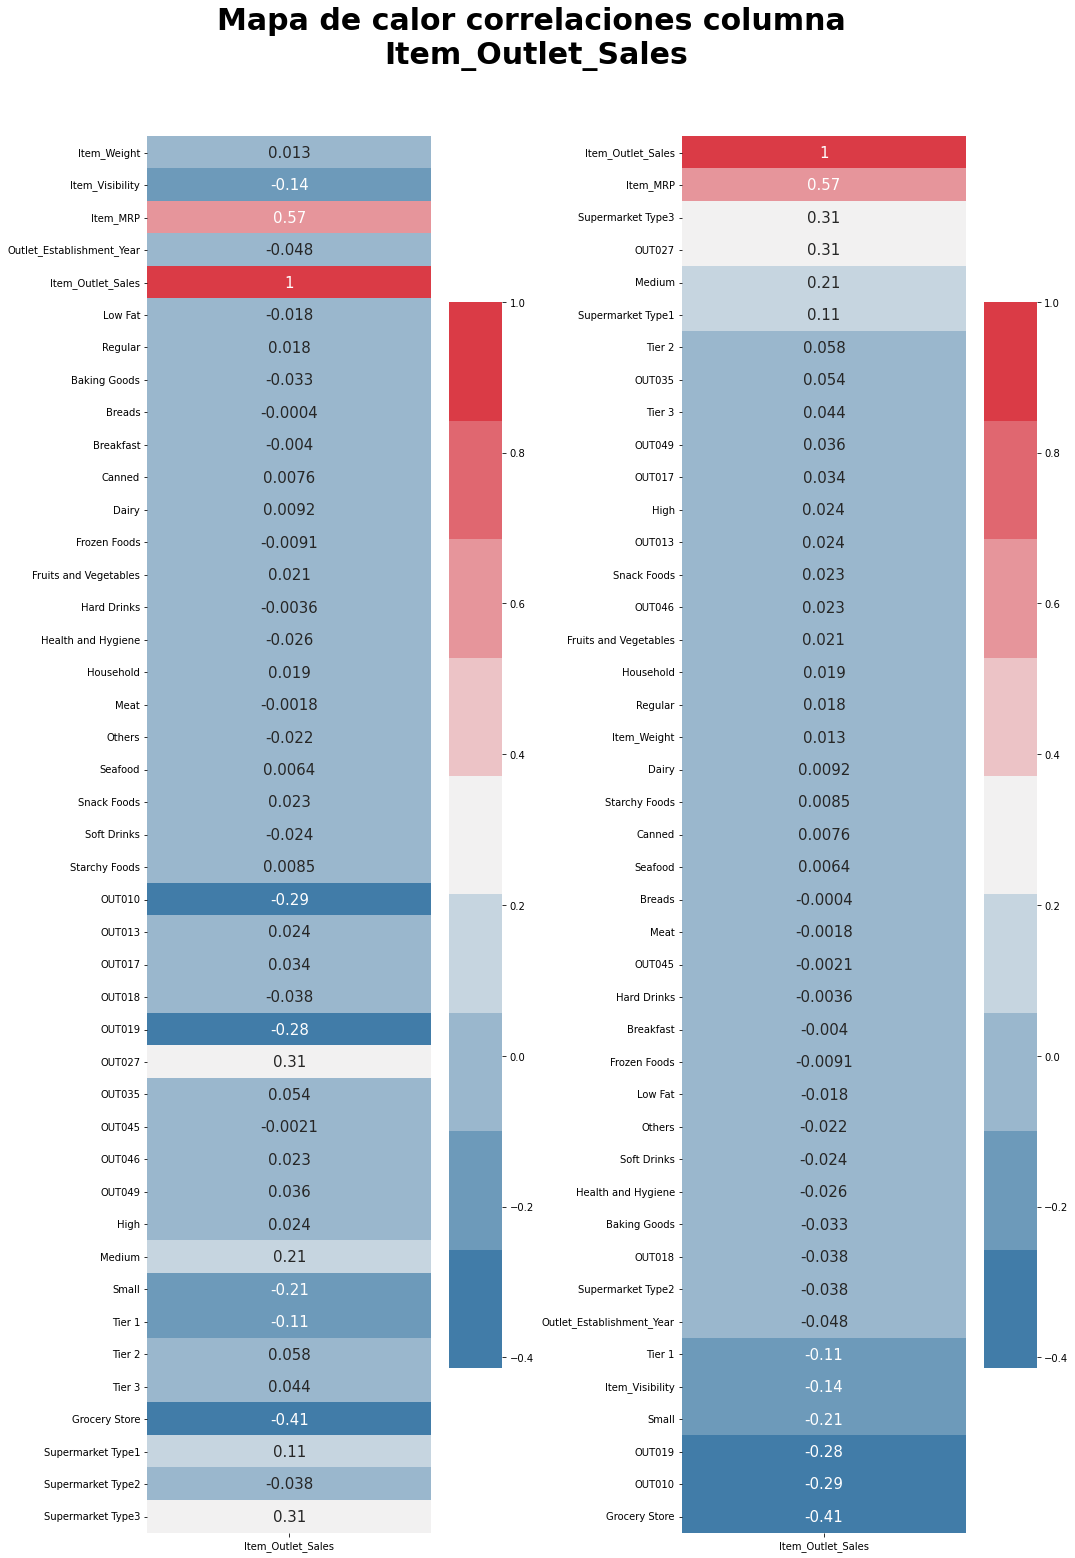

In [88]:
# Se aplica además un mapa de calor para pbtener una correación más clara
import matplotlib.pyplot as plt
import seaborn as sns

# Puede utilizar un mapa de calor para facilitar (en teoría) la lectura de la matriz de correlación
fig1 = plt.figure(figsize=(15,20))
plt.suptitle("Mapa de calor correlaciones columna \nItem_Outlet_Sales",fontsize=30, fontweight='bold', y=1.08)

# Cada figura queda definida bajo un 'ax' que corresponde a un subplot diferente, que para el caso de esta figura, tiene 3 filas y dos columnas

ax1 = fig1.add_subplot(1,2,1) 
sns.heatmap(it_sal_corr, cmap = sns.diverging_palette(240, 10, n=9), annot=True,
                  annot_kws={"size": 15})

ax2 = fig1.add_subplot(1,2,2) 
sns.heatmap(it_sal_corr.sort_values(by='Item_Outlet_Sales', ascending=False), cmap = sns.diverging_palette(240, 10, n=9), annot=True,
                  annot_kws={"size": 15})
fig1.tight_layout()
plt.show()
# Se agrega annot para que muestre los valores de la correlación, annot_kws cambia el tamaño de las anotaciones

Se han graficado las correlaciones ordenadas de acuerdo a las columnas del dataframe desde donde se obtuvieron las columnas de características y las del objetivo y otro ordenado de acuerdo al valor de la correlación.

La matríz de correlación analiza las columnas no categóricas evaluando la manera en que se relacionan entre sí. 
Esta relación puede ser de manera positiva o negativa, se observa si es que las variaciones entre cada columna afectan a las demás, es decir si es que una sube, la otra también sube o en su defecto si es que esta se ve afectada de manera negativa disminuyendo su valor. El coeficiente puede fluctuar entre 1 y -1 dependiendo del tipo de correlación que tenga, positiva y negativa respectivamente.

Observando el mapa de color ayuda se desprende el hecho de que sí existen columnas que tienen una mayor inflencia sobre las ventas de cada producto, vemos que aquellas columnas con un valor más cercano a 1 o -1 influyen de manera directa o indirecta sobre esta, mientras que las más cercanas al centro o a 0, no indican una mayor relevancia.

Gracias a este tipo de análisis es posible decidir que columnas deberían eliminarse para intentar mejorar la precisión del modelo.